In [1]:
def logistic_function(x):
  import numpy as np
  y = 1/(1+np.exp(-x))
  return y

In [2]:
import numpy as np
def test_logistic_function():

  x_scalar =0
  expected_output_scalar = round (1/(1+np.exp(0)),3)
  assert round(logistic_function(x_scalar),3) == expected_output_scalar, "Test failed for scalar input"

  x_pos = 2
  expected_output_pos = round(1/(1+np.exp(-2)),3)
  assert round(logistic_function(x_pos),3) == expected_output_pos,"Test failed for positive scalar input"

  x_neg = -3
  expected_output_neg = round(1/(1+np.exp(3)),3)
  assert round(logistic_function(x_neg),3) == expected_output_neg,"Test failed for negative scalar input"

  x_array = np.array([0,2,-3])
  expected_output_array = np.array([0.5, 0.881, 0.047])
  assert np.all(np.round(logistic_function(x_array),3) == expected_output_array),"Test failed for numpy array input"
  print("All test passed!")

test_logistic_function()

All test passed!


In [3]:
def log_loss(y_true, y_pred):
  import numpy as np
  eps = 1e-10
  y_pred = np.clip(y_pred, eps, 1-eps)
  loss = -y_true*np.log(y_pred)-(1-y_true)*np.log(1-y_pred)
  return loss

In [4]:
y_true, y_pred = 0, 0.1
print(f'log loss{y_true},{y_pred}===>{log_loss(y_true,y_pred)}')
print("-------------------------------------------------------------------")

y_true, y_pred = 1, 0.9
print(f'log loss{y_true},{y_pred} ===>{log_loss(y_true,y_pred)}')

log loss0,0.1===>0.10536051565782628
-------------------------------------------------------------------
log loss1,0.9 ===>0.10536051565782628


In [5]:
def test_log_loss():
  import numpy as np

  #test 1
  y_true = 1
  y_pred = 1
  expected_loss = 0.0
  assert np.isclose(log_loss(y_true, y_pred),expected_loss),"Test failed for perfect prediction(y_true = 1, y_pred = 1)"

  #test2
  y_true = 0
  y_pred = 0
  expected_loss = 0.0
  assert np.isclose(log_loss(y_true, y_pred),expected_loss),"Test failed for perfect prediction(y_true = 0, y_pred = 0)"

  #test3
  y_true = 1
  y_pred = 0
  try:
    log_loss(y_true,y_pred)
  except ValueError:
    pass

  #test4
  y_true = 0
  y_pred= 1
  try:
    log_loss(y_true, y_pred)
  except ValueError:
    pass

  #test5
  y_true = 1
  y_pred = 0.8
  expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2))
  assert np.isclose(log_loss(y_true, y_pred),expected_loss, atol=1e-6),"Test failed for partially correct prediction(y_true = 1, y_pred = 0.8)"

  y_true= 0
  y_pred= 0.2
  expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8))
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6),"Test failed for partially correct prediction(y_true = 0, y_pred = 0.2)"
  print("All tests passed!")
test_log_loss()

All tests passed!


In [6]:
def cost_function(y_true, y_pred):
  assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
  n = len(y_pred)
  loss_vec = -y_true*np.log(y_pred)-(1-y_true)*np.log(1-y_pred)
  cost = np.mean(loss_vec)
  return cost

In [7]:
import numpy as np
def test_cost_function():
  y_true = np.array([1, 0, 1])
  y_pred = np.array([0.9, 0.1, 0.8])
  expected_cost = (-(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
                   -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
                   -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)) / 3

  result = cost_function(y_true, y_pred)
  assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"
  print("Test passed for simple case!")
test_cost_function()

Test passed for simple case!


In [8]:
import numpy as np
def costfunction_logreg(X, y, w, b):
    n, d = X.shape
    assert len(y) == n, "Number of feature observations and number of target observations do not match."
    assert len(w) == d, "Number of features and number of weight parameters do not match."

    z = np.dot(X, w) + b
    y_pred = 1 / (1 + np.exp(-z))

    cost = cost_function(y, y_pred)
    return cost
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost for logistic regression(X={X}, y={y}, w={w}, b={b}) = {costfunction_logreg(X, y, w, b)}")

cost for logistic regression(X=[[ 10  20]
 [-10  10]], y=[1 0], w=[0.5 1.5], b=1) = 5.500008350784906


In [9]:

def compute_gradient(X, y, w, b):
    n, d = X.shape
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    y_pred = 1 / (1 + np.exp(-(np.dot(X, w) + b)))

    grad_w = -(1/n) * np.dot(X.T, (y - y_pred))
    grad_b = -(1/n) * np.sum(y - y_pred)

    return grad_w, grad_b

In [10]:
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1
try:
  grad_w, grad_b = compute_gradient(X, y, w, b)
  print("Gradients computed successfully.")
  print(f"grad_w: {grad_w}")
  print(f"grad_b: {grad_b}")
except AssertionError as e:
  print(f"Assertion error: {e}")

Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


In [11]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):

        grad_w, grad_b = compute_gradient(X, y, w, b)

        w -= alpha * grad_w
        b -= alpha * grad_b

        cost = costfunction_logreg(X, y, w, b)

        cost_history.append(cost)
        params_history.append((w.copy(), b))

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history

X = np.array([[0.1, 0.2], [-0.1, 0.1]])
y = np.array([1, 0])
w = np.zeros(X.shape[1])
b = 0.0
alpha = 0.1
n_iter = 100000

w_out, b_out, cost_history, params_history = gradient_descent(
    X, y, w, b, alpha, n_iter, show_cost=False, show_params=False)

for i in range(0, n_iter, 1000):
  print(f"Iteration {i}: Cost = {cost_history[i]:.6f}")

print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")

Iteration 0: Cost = 0.692835
Iteration 1000: Cost = 0.460524
Iteration 2000: Cost = 0.330495
Iteration 3000: Cost = 0.252182
Iteration 4000: Cost = 0.201474
Iteration 5000: Cost = 0.166589
Iteration 6000: Cost = 0.141392
Iteration 7000: Cost = 0.122469
Iteration 8000: Cost = 0.107804
Iteration 9000: Cost = 0.096142
Iteration 10000: Cost = 0.086670
Iteration 11000: Cost = 0.078836
Iteration 12000: Cost = 0.072259
Iteration 13000: Cost = 0.066663
Iteration 14000: Cost = 0.061849
Iteration 15000: Cost = 0.057667
Iteration 16000: Cost = 0.054000
Iteration 17000: Cost = 0.050762
Iteration 18000: Cost = 0.047882
Iteration 19000: Cost = 0.045305
Iteration 20000: Cost = 0.042985
Iteration 21000: Cost = 0.040888
Iteration 22000: Cost = 0.038981
Iteration 23000: Cost = 0.037242
Iteration 24000: Cost = 0.035649
Iteration 25000: Cost = 0.034184
Iteration 26000: Cost = 0.032833
Iteration 27000: Cost = 0.031583
Iteration 28000: Cost = 0.030424
Iteration 29000: Cost = 0.029345
Iteration 30000: Cost =

In [12]:
def test_gradient_descent():
  X = np.array([[0.1, 0.2], [-0.1, 0.1]])
  y = np.array([1, 0])
  w = np.zeros(X.shape[1])
  b = 0.0
  alpha = 0.1
  n_iter = 100

  w_out, b_out, cost_history, _ = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False,
  show_params=False)

  assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
  assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
  assert isinstance(b_out, float), "Bias output is not a float"
  assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
  print("All tests passed!")

test_gradient_descent()

All tests passed!


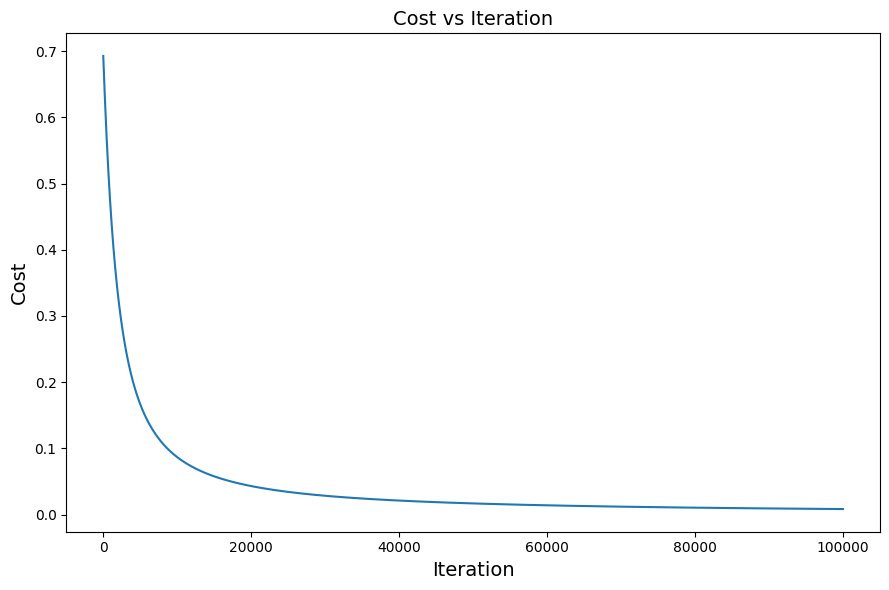

In [13]:

import matplotlib.pyplot as plt
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

In [14]:
import numpy as np

def prediction(X, w, b, threshold=0.5):
    y_test_prob = 1 / (1 + np.exp(-(np.dot(X, w) + b)))

    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred

In [15]:
def test_prediction():
  X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])
  w_test = np.array([1.0, -1.0])
  b_test = 0.0
  threshold = 0.5
  expected_output = np.array([0, 1, 1])
  y_pred = prediction(X_test, w_test, b_test, threshold)
  assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
  print("Test passed!")
test_prediction()

Test passed!


In [16]:
import numpy as np

def evaluate_classification(y_true, y_pred):

    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

    metrics = {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

    return metrics


In [17]:
import numpy as np

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [18]:
import numpy as np
def test_softmax():
  test_cases = [
  (np.array([[0, 0, 0]]), "All zeros"),
  (np.array([[1, 2, 3]]), "Simple case"),
  (np.array([[1000, 1000, 1000]]), "Large identical values"),
  (np.array([[-1000, -1000, -1000]]), "Small identical values"),
  (np.array([[1, 0, -1]]), "Mixed positive and negative")]
  for i, (z, description) in enumerate(test_cases):
    print(f"Test {i + 1}: {description}")
  result = softmax(z)
  assert np.allclose(result.sum(axis=1), 1), f"Failed: Probabilities do not sum to 1 in {description}"
  assert np.all(result >= 0), f"Failed: Negative probabilities in {description}"
  print("Passed.")
  print("All tests passed for softmax function.")
test_softmax()


Test 1: All zeros
Test 2: Simple case
Test 3: Large identical values
Test 4: Small identical values
Test 5: Mixed positive and negative
Passed.
All tests passed for softmax function.


In [19]:

def loss_softmax(y_pred, y_true):
  return -np.sum(y_true * np.log(y_pred + 1e-10))


In [22]:
import numpy as np
def loss_softmax(y_true, y_pred):
    epsilon = 1e-15  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred))
    return loss


# Test function
def test_loss_softmax():
    y_true = np.array([0, 1, 0])
    y_pred = np.array([0.1, 0.8, 0.1])
    expected_loss = -np.log(0.8)
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 1 Failed"

    y_true = np.array([1, 0, 0])
    y_pred = np.array([0.3, 0.4, 0.3])
    expected_loss = -np.log(0.3)
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 2 Failed"

    y_true = np.array([0, 1, 0])
    y_pred = np.array([0.01, 0.98, 0.01])
    expected_loss = -np.log(0.98)
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 3 Failed"

    print("All test cases passed!")


# Run tests
test_loss_softmax()



All test cases passed!


In [23]:
import numpy as np
def cost_softmax(X, y, W, b):
  n, d = X.shape
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  return -np.sum(y * np.log(y_pred + 1e-10)) / n

In [25]:
import numpy as np
def test_cost_softmax():
  X = np.array([[1, 2], [2, 3], [3, 4]])
  y = np.array([[1, 0], [0, 1], [1, 0]])
  W = np.array([[1, -1], [-1, 1]])
  b = np.array([0, 0])
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]
  assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test Case 1 Failed"

  X = np.array([[1, 0], [0, 1], [1, 1]])
  y = np.array([[1, 0], [0, 1], [1, 0]])
  W = np.zeros((2, 2))
  b = np.zeros(2)
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]
  assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test Case 2 Failed"
  print("All test cases passed!")
test_cost_softmax()

All test cases passed!


In [26]:
import numpy as np
def compute_gradient_softmax(X, y, W, b):
  n, d = X.shape
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  grad_W = np.dot(X.T, (y_pred - y)) / n
  grad_b = np.sum(y_pred - y, axis=0) / n
  return grad_W, grad_b

In [27]:
def test_compute_gradient_softmax():
  X = np.array([[1, 2], [3, 4]])
  y = np.array([[1, 0], [0, 1]])
  W = np.array([[0.1, 0.2], [0.3, 0.4]])
  b = np.array([0.01, 0.02])

  z = np.dot(X, W) + b
  y_pred = softmax(z)
  grad_W_expected = np.dot(X.T, (y_pred - y)) / X.shape[0]
  grad_b_expected = np.sum(y_pred - y, axis=0) / X.shape[0]

  grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

  assert np.allclose(grad_W, grad_W_expected, atol=1e-6), "Gradient W does not match expected values"
  assert np.allclose(grad_b, grad_b_expected, atol=1e-6), "Gradient b does not match expected values"
  print("All tests passed for compute_gradient_softmax!")

test_compute_gradient_softmax()

All tests passed for compute_gradient_softmax!


In [28]:
import numpy as np
def predict_softmax(X, W, b):
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  return np.argmax(y_pred, axis=1)

In [29]:
def test_predict_softmax():
  np.random.seed(0)
  n, d, c = 10, 5, 3
  X = np.random.rand(n, d)
  W = np.random.rand(d, c)
  b = np.random.rand(c)
  predictions = predict_softmax(X, W, b)

  assert predictions.shape == (n,), f"Shape mismatch: expected {(n,)}, got {predictions.shape}"
  assert np.all(predictions >= 0) and np.all(predictions < c), (f"Predictions out of range: expected 0 to {c-1}, got {predictions}")
  assert np.issubdtype(predictions.dtype, np.integer), f"Predictions are not integers: {predictions.dtype}"
  print("All tests passed for predict_softmax!")

test_predict_softmax()

All tests passed for predict_softmax!


In [30]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_classification(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)

    return cm, precision, recall, f1